In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import lux

In [2]:
def basic_visualization(dataset):
    pass

In [3]:
def BloodGroupTypes(data):
    data.loc[(data['Blood Group'] == 'A+')|(data['Blood Group'] == 'A'),'Blood Group']='A+ve'
    data.loc[(data['Blood Group'] == 'B+')|(data['Blood Group'] == 'B'),'Blood Group']='B+ve'
    data.loc[(data['Blood Group'] == 'O+')|(data['Blood Group'] == 'O'),'Blood Group']='O+ve'
    data.loc[(data['Blood Group'] == 'AB+')|(data['Blood Group'] == 'AB'),'Blood Group']='AB+ve'
    data.loc[(data['Blood Group'] == 'A-'),'Blood Group']='A-ve'
    data.loc[(data['Blood Group'] == 'B-'),'Blood Group']='B-ve'
    data.loc[(data['Blood Group'] == 'O-'),'Blood Group']='O-ve'
    data.loc[(data['Blood Group'] == 'AB-'),'Blood Group']='AB-ve'
    return data

In [4]:
def data_cleaning(dataset):
    print("Initial size of dataset {}".format(dataset.shape))
    err= dataset[ data['Blood Group'] == '#REF!' ].index
    dataset.drop(err, inplace=True)
    print("Dataset Size after removing err records {}".format(dataset.shape))
    errVAl= data[ data['Age in yrs'] == '#VALUE!' ].index
    dataset.drop(errVAl, inplace=True)
    errVAl= data[ data['BMI']== '#VALUE!' ].index
    dataset.drop(errVAl, inplace=True)
    print("Dataset Size after removing err value records {}".format(dataset.shape))    
    invalid_r= dataset[(dataset['Blood Group'].isnull()) & (dataset['Sex'].isnull())& (dataset['Height'].isnull())&(dataset['Weight'].isnull())& (dataset['BMI'].isnull())].index
    dataset.drop(invalid_r, inplace=True)
    print("Dataset Size after removing invalid records {}".format(dataset.shape))
    




    

In [5]:
def data_conversion(dataset):
    dataset=BloodGroupTypes(dataset)
    print("Blood Group Types available {}".format(data['Blood Group'].unique()))
    data['Age in yrs'] = data['Age in yrs'].apply(pd.to_numeric)
    data['Weight'] = data['Weight'].str.rstrip('kg').apply(pd.to_numeric)
    data['Height'] = data['Height'].str.rstrip('cm').apply(pd.to_numeric)
    data['Temperature'] = data['Temperature'].str.rstrip('F').apply(pd.to_numeric)
    data['Pulse'] = data['Pulse'].str.rstrip('per Min').apply(pd.to_numeric)
    data['BP'] = data['BP'].str.rstrip('mmHg')
    data['BMI'] = data['BMI'].apply(pd.to_numeric)
    

In [6]:
def BP_manipulation(data):
    data.loc[(data['BP'].isnull()) & (data['Weight'].between(20,42,inclusive=True))& (data['Age in yrs'] == 10),'BP']='96/117'
    data.loc[(data['BP'].isnull()) & (data['Weight'].between(20,42,inclusive=True))& (data['Age in yrs'] == 11),'BP']='98/119'
    data.loc[(data['BP'].isnull()) & (data['Weight'].between(20,42,inclusive=True))& (data['Age in yrs'] == 12),'BP']='100/121'
    data.loc[(data['BP'].isnull()) & (data['Weight']>=50) & (data['Age in yrs'] >= 13),'BP']='102/124'
    

In [7]:
def column_gen(data):
    new=data['BP'].str.split('/',n=1,expand=True)
    data['systolic']=new[0]
    data['diastolic']=new[1]
    new=data['Left_Eye_Power'].str.split('/',n=1,expand=True)
    data['LEP0']=new[0]
    data['LEP1']=new[1]
    new=data['Right_Eye_Power'].str.split('/',n=1,expand=True)
    data['REP0']=new[0]
    data['REP1']=new[1]
    new=data['Left_Eye_Pwr_WthGlass'].str.split('/',n=1,expand=True)
    data['LEPG0']=new[0]
    data['LEPG1']=new[1]
    new=data['Right_Eye_Pwr_WthGlass'].str.split('/',n=1,expand=True)
    data['REPG0']=new[0]
    data['REPG1']=new[1]
    
    
    

In [8]:
data=pd.read_csv('data.csv')

In [9]:
data_cleaning(data)
data_conversion(data)

Initial size of dataset (2803, 34)
Dataset Size after removing err records (2801, 34)
Dataset Size after removing err value records (2704, 34)
Dataset Size after removing invalid records (1316, 34)
Blood Group Types available ['A+ve' 'O+ve' 'B+ve' 'AB+ve' 'O-ve' 'B-ve' nan 'A-ve' 'AB-ve']


In [10]:
column_gen(data)

In [11]:
errVAl= data[ data['BMI'] == '#VALUE!' ].index


In [12]:
data.head(400)

,UHID,Sex,Age in yrs,Blood Group,Class,School ID,Height,Weight,BMI,Temperature,...,systolic,diastolic,LEP0,LEP1,REP0,REP1,LEPG0,LEPG1,REPG0,REPG1
0,100-0000-0001,Male,13,A+ve,8,S0000001,152.2,57.2,24.7,96.4,...,104,75,6,6,6,36,6,6,6,12
1,100-0000-0002,Male,14,O+ve,8,S0000001,160.7,36.9,14.3,97.5,...,150,69,6,6,6,6,NaN,NaN,NaN,NaN
2,100-0000-0003,Female,13,O+ve,8,S0000001,143.7,37.2,18.0,97.7,...,113,67,6,6,6,6,NaN,NaN,NaN,NaN
3,100-0000-0004,Female,13,B+ve,8,S0000001,157.3,45.4,18.3,97.8,...,114,78,6,6,6,6,NaN,NaN,NaN,NaN
4,100-0000-0005,Male,14,B+ve,8,S0000001,154.2,40.1,16.9,9.3,...,95,56,6,6,6,6,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,100-0000-0497,Female,13,O+ve,8,S0000003,152.7,35.5,15.2,98.5,...,111,85,6,12,6,12,6,6,6,6
422,100-0000-0498,Male,13,B+ve,8,S0000003,164.7,62.1,22.9,97.5,...,119,71,6,24,6,24,6,6,6,6
423,100-0000-0499,Female,13,O+ve,8,S0000003,154.5,39.0,16.3,99.3,...,113,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
424,100-0000-0500,Female,14,A+ve,8,S0000003,154.5,44.6,18.7,98.5,...,147,91,6,6,6,6,NaN,NaN,NaN,NaN


In [13]:
#data1 = pd.read_excel("HKinterns_shared_data.xlsx",engine='openpyxl',)

In [14]:
data.columns

Index(['UHID', 'Sex', 'Age in yrs', 'Blood Group', 'Class', ' School ID',
       'Height', 'Weight', 'BMI', 'Temperature', 'BP', 'Pulse', 'CBTestResult',
       'Caries', 'Discoloration', 'Healthy_Gums', 'Malocclusion',
       'Oral_Hygine', 'TeethWellFormed', 'Serious_Dental_Issue',
       'Dentist_Recommendation', 'LEFT_EAR', 'RIGHT_EAR', 'ENT_Issue',
       'Eye_Issue', 'ENT_Issue_Detail', 'Eye_Issue_Detail', 'Wears_Glass',
       'Left_Eye_Power', 'Right_Eye_Power', 'Left_Eye_Pwr_WthGlass',
       'Right_Eye_Pwr_WthGlass', 'Overall Summary', 'Recommendation',
       'systolic', 'diastolic', 'LEP0', 'LEP1', 'REP0', 'REP1', 'LEPG0',
       'LEPG1', 'REPG0', 'REPG1'],
      dtype='object')

In [15]:
data.head()

,UHID,Sex,Age in yrs,Blood Group,Class,School ID,Height,Weight,BMI,Temperature,...,systolic,diastolic,LEP0,LEP1,REP0,REP1,LEPG0,LEPG1,REPG0,REPG1
0,100-0000-0001,Male,13,A+ve,8,S0000001,152.2,57.2,24.7,96.4,...,104,75,6,6,6,36,6,6,6,12
1,100-0000-0002,Male,14,O+ve,8,S0000001,160.7,36.9,14.3,97.5,...,150,69,6,6,6,6,NaN,NaN,NaN,NaN
2,100-0000-0003,Female,13,O+ve,8,S0000001,143.7,37.2,18.0,97.7,...,113,67,6,6,6,6,NaN,NaN,NaN,NaN
3,100-0000-0004,Female,13,B+ve,8,S0000001,157.3,45.4,18.3,97.8,...,114,78,6,6,6,6,NaN,NaN,NaN,NaN
4,100-0000-0005,Male,14,B+ve,8,S0000001,154.2,40.1,16.9,9.3,...,95,56,6,6,6,6,NaN,NaN,NaN,NaN


In [16]:
data.corr(method ='spearman')

,Age in yrs,Height,Weight,BMI,Temperature,Pulse
Age in yrs,1.000000,0.939495,0.880381,0.533468,-0.237794,-0.214955
Height,0.939495,1.000000,0.932793,0.583786,-0.251815,-0.176448
Weight,0.880381,0.932793,1.000000,0.813248,-0.306335,-0.048817
BMI,0.533468,0.583786,0.813248,1.000000,-0.360938,0.047238
Temperature,-0.237794,-0.251815,-0.306335,-0.360938,1.000000,0.125926
Pulse,-0.214955,-0.176448,-0.048817,0.047238,0.125926,1.000000


In [17]:
bmi_correl = data[['Height','Weight','BMI','Age in yrs']].corr(method='pearson')
bmi_correl

,Height,Weight,BMI,Age in yrs
Height,1.000000,0.632792,0.290891,0.656220
Weight,0.632792,1.000000,0.915726,0.550950
BMI,0.290891,0.915726,1.000000,0.330319
Age in yrs,0.656220,0.550950,0.330319,1.000000


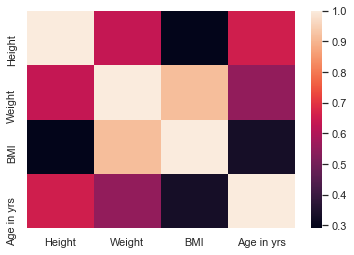

In [21]:
import seaborn as sns; sns.set_theme()

ax = sns.heatmap(bmi_correl)

ValueError: Invalid property specified for object of type plotly.graph_objs.Heatmap: 'Height'

Did you mean "text"?

    Valid properties:
        autocolorscale
            Determines whether the colorscale is a default palette
            (`autocolorscale: true`) or the palette determined by
            `colorscale`. In case `colorscale` is unspecified or
            `autocolorscale` is true, the default  palette will be
            chosen according to whether numbers in the `color`
            array are all positive, all negative or mixed.
        coloraxis
            Sets a reference to a shared color axis. References to
            these shared color axes are "coloraxis", "coloraxis2",
            "coloraxis3", etc. Settings for these shared color axes
            are set in the layout, under `layout.coloraxis`,
            `layout.coloraxis2`, etc. Note that multiple color
            scales can be linked to the same color axis.
        colorbar
            :class:`plotly.graph_objects.heatmap.ColorBar` instance
            or dict with compatible properties
        colorscale
            Sets the colorscale. The colorscale must be an array
            containing arrays mapping a normalized value to an rgb,
            rgba, hex, hsl, hsv, or named color string. At minimum,
            a mapping for the lowest (0) and highest (1) values are
            required. For example, `[[0, 'rgb(0,0,255)'], [1,
            'rgb(255,0,0)']]`. To control the bounds of the
            colorscale in color space, use`zmin` and `zmax`.
            Alternatively, `colorscale` may be a palette name
            string of the following list: Greys,YlGnBu,Greens,YlOrR
            d,Bluered,RdBu,Reds,Blues,Picnic,Rainbow,Portland,Jet,H
            ot,Blackbody,Earth,Electric,Viridis,Cividis.
        connectgaps
            Determines whether or not gaps (i.e. {nan} or missing
            values) in the `z` data are filled in. It is defaulted
            to true if `z` is a one dimensional array and `zsmooth`
            is not false; otherwise it is defaulted to false.
        customdata
            Assigns extra data each datum. This may be useful when
            listening to hover, click and selection events. Note
            that, "scatter" traces also appends customdata items in
            the markers DOM elements
        customdatasrc
            Sets the source reference on Chart Studio Cloud for
            customdata .
        dx
            Sets the x coordinate step. See `x0` for more info.
        dy
            Sets the y coordinate step. See `y0` for more info.
        hoverinfo
            Determines which trace information appear on hover. If
            `none` or `skip` are set, no information is displayed
            upon hovering. But, if `none` is set, click and hover
            events are still fired.
        hoverinfosrc
            Sets the source reference on Chart Studio Cloud for
            hoverinfo .
        hoverlabel
            :class:`plotly.graph_objects.heatmap.Hoverlabel`
            instance or dict with compatible properties
        hoverongaps
            Determines whether or not gaps (i.e. {nan} or missing
            values) in the `z` data have hover labels associated
            with them.
        hovertemplate
            Template string used for rendering the information that
            appear on hover box. Note that this will override
            `hoverinfo`. Variables are inserted using %{variable},
            for example "y: %{y}". Numbers are formatted using
            d3-format's syntax %{variable:d3-format}, for example
            "Price: %{y:$.2f}". https://github.com/d3/d3-3.x-api-
            reference/blob/master/Formatting.md#d3_format for
            details on the formatting syntax. Dates are formatted
            using d3-time-format's syntax %{variable|d3-time-
            format}, for example "Day: %{2019-01-01|%A}".
            https://github.com/d3/d3-time-format#locale_format for
            details on the date formatting syntax. The variables
            available in `hovertemplate` are the ones emitted as
            event data described at this link
            https://plotly.com/javascript/plotlyjs-events/#event-
            data. Additionally, every attributes that can be
            specified per-point (the ones that are `arrayOk: true`)
            are available.  Anything contained in tag `<extra>` is
            displayed in the secondary box, for example
            "<extra>{fullData.name}</extra>". To hide the secondary
            box completely, use an empty tag `<extra></extra>`.
        hovertemplatesrc
            Sets the source reference on Chart Studio Cloud for
            hovertemplate .
        hovertext
            Same as `text`.
        hovertextsrc
            Sets the source reference on Chart Studio Cloud for
            hovertext .
        ids
            Assigns id labels to each datum. These ids for object
            constancy of data points during animation. Should be an
            array of strings, not numbers or any other type.
        idssrc
            Sets the source reference on Chart Studio Cloud for
            ids .
        legendgroup
            Sets the legend group for this trace. Traces part of
            the same legend group hide/show at the same time when
            toggling legend items.
        meta
            Assigns extra meta information associated with this
            trace that can be used in various text attributes.
            Attributes such as trace `name`, graph, axis and
            colorbar `title.text`, annotation `text`
            `rangeselector`, `updatemenues` and `sliders` `label`
            text all support `meta`. To access the trace `meta`
            values in an attribute in the same trace, simply use
            `%{meta[i]}` where `i` is the index or key of the
            `meta` item in question. To access trace `meta` in
            layout attributes, use `%{data[n[.meta[i]}` where `i`
            is the index or key of the `meta` and `n` is the trace
            index.
        metasrc
            Sets the source reference on Chart Studio Cloud for
            meta .
        name
            Sets the trace name. The trace name appear as the
            legend item and on hover.
        opacity
            Sets the opacity of the trace.
        reversescale
            Reverses the color mapping if true. If true, `zmin`
            will correspond to the last color in the array and
            `zmax` will correspond to the first color.
        showlegend
            Determines whether or not an item corresponding to this
            trace is shown in the legend.
        showscale
            Determines whether or not a colorbar is displayed for
            this trace.
        stream
            :class:`plotly.graph_objects.heatmap.Stream` instance
            or dict with compatible properties
        text
            Sets the text elements associated with each z value.
        textsrc
            Sets the source reference on Chart Studio Cloud for
            text .
        transpose
            Transposes the z data.
        uid
            Assign an id to this trace, Use this to provide object
            constancy between traces during animations and
            transitions.
        uirevision
            Controls persistence of some user-driven changes to the
            trace: `constraintrange` in `parcoords` traces, as well
            as some `editable: true` modifications such as `name`
            and `colorbar.title`. Defaults to `layout.uirevision`.
            Note that other user-driven trace attribute changes are
            controlled by `layout` attributes: `trace.visible` is
            controlled by `layout.legend.uirevision`,
            `selectedpoints` is controlled by
            `layout.selectionrevision`, and `colorbar.(x|y)`
            (accessible with `config: {editable: true}`) is
            controlled by `layout.editrevision`. Trace changes are
            tracked by `uid`, which only falls back on trace index
            if no `uid` is provided. So if your app can add/remove
            traces before the end of the `data` array, such that
            the same trace has a different index, you can still
            preserve user-driven changes if you give each trace a
            `uid` that stays with it as it moves.
        visible
            Determines whether or not this trace is visible. If
            "legendonly", the trace is not drawn, but can appear as
            a legend item (provided that the legend itself is
            visible).
        x
            Sets the x coordinates.
        x0
            Alternate to `x`. Builds a linear space of x
            coordinates. Use with `dx` where `x0` is the starting
            coordinate and `dx` the step.
        xaxis
            Sets a reference between this trace's x coordinates and
            a 2D cartesian x axis. If "x" (the default value), the
            x coordinates refer to `layout.xaxis`. If "x2", the x
            coordinates refer to `layout.xaxis2`, and so on.
        xcalendar
            Sets the calendar system to use with `x` date data.
        xgap
            Sets the horizontal gap (in pixels) between bricks.
        xperiod
            Only relevant when the axis `type` is "date". Sets the
            period positioning in milliseconds or "M<n>" on the x
            axis. Special values in the form of "M<n>" could be
            used to declare the number of months. In this case `n`
            must be a positive integer.
        xperiod0
            Only relevant when the axis `type` is "date". Sets the
            base for period positioning in milliseconds or date
            string on the x0 axis. When `x0period` is round number
            of weeks, the `x0period0` by default would be on a
            Sunday i.e. 2000-01-02, otherwise it would be at
            2000-01-01.
        xperiodalignment
            Only relevant when the axis `type` is "date". Sets the
            alignment of data points on the x axis.
        xsrc
            Sets the source reference on Chart Studio Cloud for  x
            .
        xtype
            If "array", the heatmap's x coordinates are given by
            "x" (the default behavior when `x` is provided). If
            "scaled", the heatmap's x coordinates are given by "x0"
            and "dx" (the default behavior when `x` is not
            provided).
        y
            Sets the y coordinates.
        y0
            Alternate to `y`. Builds a linear space of y
            coordinates. Use with `dy` where `y0` is the starting
            coordinate and `dy` the step.
        yaxis
            Sets a reference between this trace's y coordinates and
            a 2D cartesian y axis. If "y" (the default value), the
            y coordinates refer to `layout.yaxis`. If "y2", the y
            coordinates refer to `layout.yaxis2`, and so on.
        ycalendar
            Sets the calendar system to use with `y` date data.
        ygap
            Sets the vertical gap (in pixels) between bricks.
        yperiod
            Only relevant when the axis `type` is "date". Sets the
            period positioning in milliseconds or "M<n>" on the y
            axis. Special values in the form of "M<n>" could be
            used to declare the number of months. In this case `n`
            must be a positive integer.
        yperiod0
            Only relevant when the axis `type` is "date". Sets the
            base for period positioning in milliseconds or date
            string on the y0 axis. When `y0period` is round number
            of weeks, the `y0period0` by default would be on a
            Sunday i.e. 2000-01-02, otherwise it would be at
            2000-01-01.
        yperiodalignment
            Only relevant when the axis `type` is "date". Sets the
            alignment of data points on the y axis.
        ysrc
            Sets the source reference on Chart Studio Cloud for  y
            .
        ytype
            If "array", the heatmap's y coordinates are given by
            "y" (the default behavior when `y` is provided) If
            "scaled", the heatmap's y coordinates are given by "y0"
            and "dy" (the default behavior when `y` is not
            provided)
        z
            Sets the z data.
        zauto
            Determines whether or not the color domain is computed
            with respect to the input data (here in `z`) or the
            bounds set in `zmin` and `zmax`  Defaults to `false`
            when `zmin` and `zmax` are set by the user.
        zhoverformat
            Sets the hover text formatting rule using d3 formatting
            mini-languages which are very similar to those in
            Python. See: https://github.com/d3/d3-3.x-api-
            reference/blob/master/Formatting.md#d3_format
        zmax
            Sets the upper bound of the color domain. Value should
            have the same units as in `z` and if set, `zmin` must
            be set as well.
        zmid
            Sets the mid-point of the color domain by scaling
            `zmin` and/or `zmax` to be equidistant to this point.
            Value should have the same units as in `z`. Has no
            effect when `zauto` is `false`.
        zmin
            Sets the lower bound of the color domain. Value should
            have the same units as in `z` and if set, `zmax` must
            be set as well.
        zsmooth
            Picks a smoothing algorithm use to smooth `z` data.
        zsrc
            Sets the source reference on Chart Studio Cloud for  z
            .
        
Did you mean "text"?

Bad property path:
Height
^^^^^^

In [18]:
data['BP'].unique()

array(['104/75  ', '150/69  ', '113/67  ', '114/78  ', '95/56  ',
       '124/72  ', '118/78  ', '111/69  ', '104/84  ', '125/78  ',
       '106/68  ', '106/62  ', '92/65  ', '128/75  ', '103/59  ',
       '109/68  ', '139/63  ', '119/64  ', '110/68  ', '127/80  ',
       '103/77  ', '106/70  ', '111/96  ', '128/80  ', '109/75  ',
       '124/81  ', '118/68  ', '137/90  ', '143/89  ', '114/68  ',
       '134/78  ', '101/60  ', '134/79  ', '120/80  ', '115/71  ',
       '121/78  ', '120/73  ', '115/75  ', '115/69  ', '102/81  ',
       '122/76  ', '107/73  ', '98/61  ', '93/80  ', '109/76  ',
       '120/78  ', '125/76  ', '119/82  ', '121/63  ', '130/73  ',
       '114/79  ', '126/84  ', '115/72  ', '120/50  ', '91/55  ',
       '119/87  ', '113/74  ', '86/58  ', '111/71  ', '107/68  ',
       '100/65  ', '128/73  ', '87/61  ', '97/65  ', '94/68  ',
       '120/85  ', '139/87  ', '126/81  ', '125/82  ', '115/82  ',
       '121/80  ', '109/67  ', '108/73  ', '121/74  ', '91/61  ',
     

In [19]:
data

,UHID,Sex,Age in yrs,Blood Group,Class,School ID,Height,Weight,BMI,Temperature,...,systolic,diastolic,LEP0,LEP1,REP0,REP1,LEPG0,LEPG1,REPG0,REPG1
0,100-0000-0001,Male,13,A+ve,8,S0000001,152.2,57.2,24.7,96.4,...,104,75,6,6,6,36,6,6,6,12
1,100-0000-0002,Male,14,O+ve,8,S0000001,160.7,36.9,14.3,97.5,...,150,69,6,6,6,6,NaN,NaN,NaN,NaN
2,100-0000-0003,Female,13,O+ve,8,S0000001,143.7,37.2,18.0,97.7,...,113,67,6,6,6,6,NaN,NaN,NaN,NaN
3,100-0000-0004,Female,13,B+ve,8,S0000001,157.3,45.4,18.3,97.8,...,114,78,6,6,6,6,NaN,NaN,NaN,NaN
4,100-0000-0005,Male,14,B+ve,8,S0000001,154.2,40.1,16.9,9.3,...,95,56,6,6,6,6,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1405,100-0000-1501,Male,28,NaN,Teacher,S0000001,170.5,82.3,28.3,96.6,...,120,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1406,100-0000-1502,Male,49,NaN,Teacher,S0000001,170.0,77.0,26.6,98.6,...,155,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1407,100-0000-1503,Male,26,B+ve,Teacher,S0000001,150.5,35.2,15.5,98.2,...,88,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1408,100-0000-1504,Female,39,NaN,Teacher,S0000001,153.5,98.5,41.8,98.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*convert xlsx into csv
*remove rows with blood group '#REF!'
*adjusting blood group types
*remove rows with all nan values(except age column)

